This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Working with Keras: A deep dive

## A spectrum of workflows

## Different ways to build Keras models

### The Sequential model

**The `Sequential` class**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model

**Incrementally building a Sequential model**

**建立model**




In [2]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model

**Calling a model for the first time to build it**

**叫出model的weight**



In [3]:
model.build(input_shape=(None, 3))
model.weights


[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[ 0.16805881, -0.07436314,  0.07393348,  0.04646578,  0.04590687,
          0.05728978, -0.24590084,  0.10218337,  0.11131653,  0.25210285,
         -0.09996724, -0.08463253,  0.25095695, -0.19547391,  0.12960711,
          0.04624832, -0.11271952,  0.14068985,  0.12651092, -0.1878871 ,
         -0.04684293,  0.12269074, -0.03922987, -0.10937968,  0.14773804,
         -0.08254619,  0.22751135, -0.05863631, -0.12173213, -0.2332411 ,
          0.1774798 , -0.0099377 , -0.07093847, -0.28215206, -0.02752799,
         -0.11826536,  0.0630824 , -0.0568323 , -0.2751119 , -0.25845563,
          0.27549428,  0.04741693, -0.17621145, -0.20208532,  0.04892358,
          0.18495008,  0.27198046, -0.17895183, -0.12847054,  0.05217353,
         -0.06914143, -0.02436236,  0.24134457, -0.0943599 ,  0.01160753,
         -0.02279708, -0.10882795, -0.12270224,  0.01694545, -0.03311092,
         -0.23214227, -0.06749816, -0.02579

In [4]:
model

**The summary method**

**輸出各層的參數**

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [6]:
model

**Naming models and layers with the `name` argument**

**給model跟各層給名字，名稱不能輸入中文或空白鍵**

In [7]:
model = keras.Sequential(name="my_model_1")
model.add(layers.Dense(64, activation="relu", name="first_layer"))
model.add(layers.Dense(10, activation="softmax", name="last_layer"))
model.build((None, 3))
model.summary()

Model: "my_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_layer (Dense)          (None, 64)                256       
_________________________________________________________________
last_layer (Dense)           (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Specifying the input shape of your model in advance**

**給定輸入**


In [8]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu", name="first_layer"))

In [9]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_layer (Dense)          (None, 64)                256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_layer (Dense)          (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### The Functional API

#### A simple example

**A simple Functional model with two `Dense` layers**

**有兩層Dense的model和參數**

In [11]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [12]:
inputs = keras.Input(shape=(3,), name="my_input")

In [13]:
inputs.shape

TensorShape([None, 3])

In [14]:
inputs.dtype

tf.float32

In [15]:
features = layers.Dense(64, activation="relu")(inputs)

In [16]:
features.shape

TensorShape([None, 64])

In [17]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs, name="example_1")

In [18]:
model.summary()

Model: "example_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_input (InputLayer)        [(None, 3)]               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### Multi-input, multi-output models

**A multi-input, multi-output Functional model**

**多重輸入輸出的model**


In [19]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
title (InputLayer)              [(None, 10000)]      0                                            
__________________________________________________________________________________________________
text_body (InputLayer)          [(None, 10000)]      0                                            
__________________________________________________________________________________________________
tags (InputLayer)               [(None, 100)]        0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 20100)        0           title[0][0]                      
                                                                 text_body[0][0]            

#### Training a multi-input, multi-output model

訓練

**Training a model by providing lists of input & target arrays**

In [20]:
#np.random.randint(low, high=None, size=None, dtype='int'))
#生成從low到high-1的數

import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))




In [21]:
tags_data

array([[0, 1, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 0, 1]])

In [22]:
np.random.randint(0, high=100, size=(5,4))

array([[54, 15, 23, 86],
       [30, 63, 63, 66],
       [89, 86,  2,  7],
       [37, 82, 98, 24],
       [46, 25, 94, 94]])

In [23]:
priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))


40/40 [==============================] - 0s 3ms/step - loss: 5.9691 - priority_loss: 0.3290 - department_loss: 5.6400 - priority_mean_absolute_error: 0.4928 - department_accuracy: 0.2516


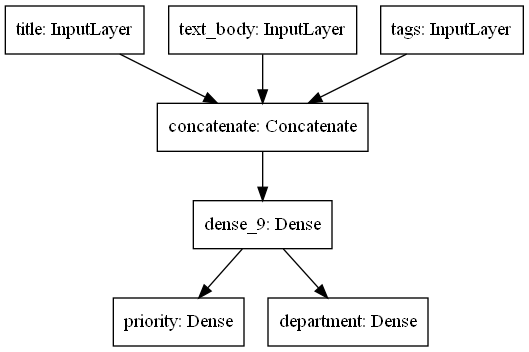

In [24]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", 
                    "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], 
                       ["accuracy"]])

model.fit([title_data, 
           text_body_data, 
           tags_data],
          [priority_data, 
           department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

keras.utils.plot_model(model, "ticket_classifier.png")

**Training a model by providing dicts of input & target arrays**

In [25]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", 
                    "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], 
                       "department": ["accuracy"]})

model.fit({"title": title_data, 
           "text_body": text_body_data, 
           "tags": tags_data},
          {"priority": priority_data, 
           "department": department_data},
          epochs=1)

model.evaluate({"title": title_data, 
                "text_body": text_body_data, 
                "tags": tags_data},
               {"priority": priority_data, 
                "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 0s 3ms/step - loss: 33.6241 - priority_loss: 0.3290 - department_loss: 33.2951 - priority_mean_absolute_error: 0.4928 - department_accuracy: 0.0562


#### The power of the Functional API: Access to layer connectivity

**查看layer**

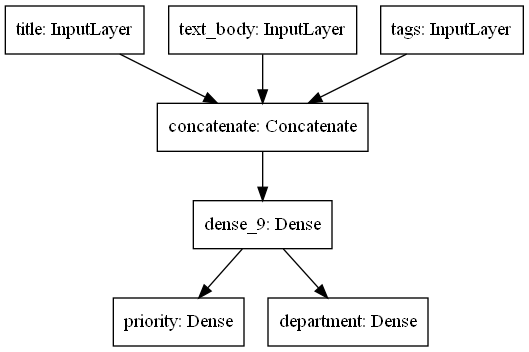

In [26]:
keras.utils.plot_model(model, "ticket_classifier.png")

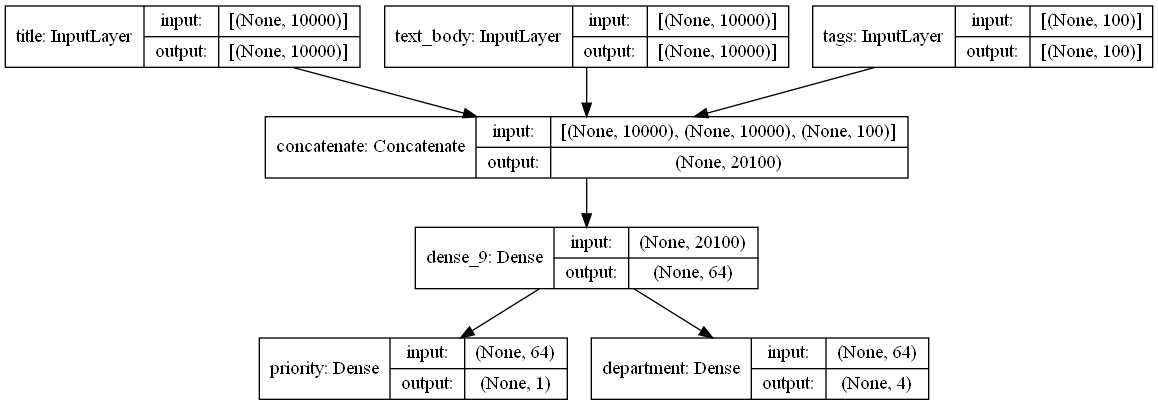

In [27]:
#把show_shapes設true觀察shape變化
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

**Retrieving the inputs or outputs of a layer in a Functional model**

**使用model.layer查看全部或是各層的layer**

In [28]:
model.layers

In [29]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [30]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

**Creating a new model by reusing intermediate layer outputs**

**修改中間的layer後生成一個新的model**

In [33]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

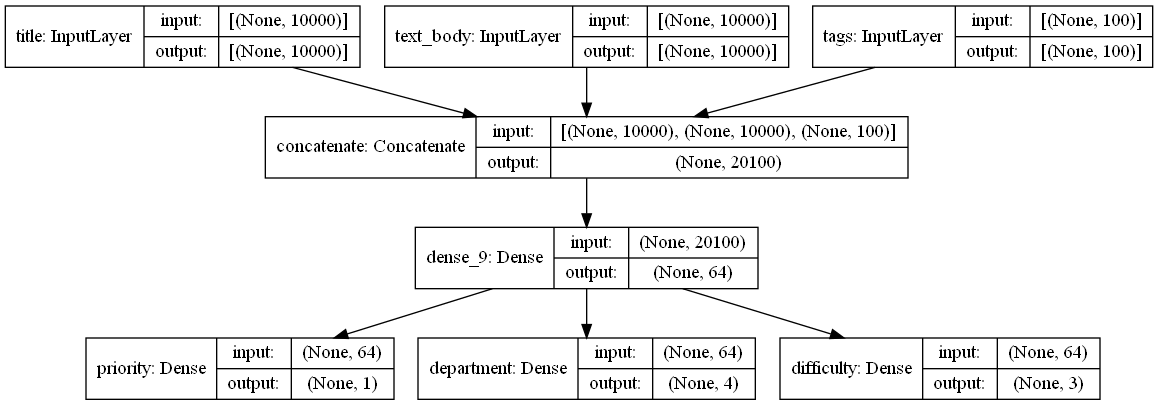

In [34]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

### Subclassing the Model class

#### Rewriting our previous example as a subclassed model

**A simple subclassed model**

**使用class**

In [43]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

In [44]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [45]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

40/40 [==============================] - 0s 3ms/step - loss: 27.1538 - output_1_loss: 0.3290 - output_2_loss: 26.8247 - output_1_mean_absolute_error: 0.4928 - output_2_accuracy: 0.1187


In [46]:

model.summary()

Model: "customer_ticket_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
concatenate_2 (Concatenate)  multiple                  0         
_________________________________________________________________
dense_13 (Dense)             multiple                  1286464   
_________________________________________________________________
dense_14 (Dense)             multiple                  65        
_________________________________________________________________
dense_15 (Dense)             multiple                  260       
Total params: 1,286,789
Trainable params: 1,286,789
Non-trainable params: 0
_________________________________________________________________


#### Beware: What subclassed models don't support

### Mixing and matching different components

**Creating a Functional model that includes a subclassed model**

**包含subclassed model的Functional model**



In [47]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                256       
_________________________________________________________________
classifier (Classifier)      (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Creating a subclassed model that includes a Functional model**

**包含Functional model的subclassed model，跟上面有些不同地方**

In [50]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()


In [51]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

### Remember: Use the right tool for the job

## Using built-in training and evaluation loops

訓練和評估的迴圈

**The standard workflow: `compile()`, `fit()`, `evaluate()`, `predict()`**

**工作的四個流程**

In [52]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2919 - accuracy: 0.9131 - val_loss: 0.1550 - val_accuracy: 0.9555
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1665 - accuracy: 0.9545 - val_loss: 0.1211 - val_accuracy: 0.9668
Epoch 3/3
313/313 [==============================] - 0s 506us/step - loss: 0.1088 - accuracy: 0.9719


### Writing your own metrics

**Implementing a custom metric by subclassing the `Metric` class**

使用class觀察上面和下面結果，結果相同


In [53]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [54]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2950 - accuracy: 0.9130 - rmse: 7.1857 - val_loss: 0.1484 - val_accuracy: 0.9568 - val_rmse: 7.3572
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1655 - accuracy: 0.9534 - rmse: 7.3525 - val_loss: 0.1202 - val_accuracy: 0.9671 - val_rmse: 7.4070
Epoch 3/3
313/313 [==============================] - 0s 558us/step - loss: 0.1021 - accuracy: 0.9734 - rmse: 7.4345


In [55]:
predictions 

array([[2.9736874e-13, 2.0131167e-15, 3.6869119e-10, ..., 1.0000000e+00,
        2.7084514e-13, 2.0562914e-10],
       [4.4650644e-13, 3.6644806e-12, 1.0000000e+00, ..., 2.0947578e-21,
        5.1782047e-12, 4.0429368e-25],
       [4.4307957e-09, 9.9993432e-01, 1.4605280e-05, ..., 3.9514784e-05,
        5.0141821e-06, 2.7149616e-07],
       ...,
       [1.0088055e-15, 4.9484852e-12, 1.0540234e-12, ..., 2.5051028e-08,
        2.2168693e-07, 6.5642748e-06],
       [2.0660694e-10, 4.8519522e-10, 4.0501798e-13, ..., 1.2984929e-11,
        9.1414095e-06, 9.5954321e-13],
       [9.5853299e-17, 9.0022172e-24, 3.5121151e-14, ..., 3.0119277e-24,
        4.4315793e-19, 4.9809078e-18]], dtype=float32)

### Using callbacks
使用callbacks

#### The EarlyStopping and ModelCheckpoint callbacks

**Using the `callbacks` argument in the `fit()` method**

**在fit()用callbacks變數**

In [56]:
#ModelCheckpoint：利用這個 Callback在每一個檢查點(Checkpoint)存檔，假設執行到一半中斷時可以從中斷點繼續訓練。
#可以使用model = keras.models.load_model("checkpoint_path.keras")載入
#EarlyStopping：設定訓練提早結束的條件，給定patience，當validation accuracy執行的幾個週期還是沒改善就停止訓練。


callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=100,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2935 - accuracy: 0.9133 - val_loss: 0.1552 - val_accuracy: 0.9554
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1652 - accuracy: 0.9539 - val_loss: 0.1221 - val_accuracy: 0.9666
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1374 - accuracy: 0.9628 - val_loss: 0.1193 - val_accuracy: 0.9704
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1276 - accuracy: 0.9678 - val_loss: 0.1123 - val_accuracy: 0.9734
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1171 - accuracy: 0.9706 - val_loss: 0.1168 - val_accuracy: 0.9732
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1100 - accuracy: 0.9735 - val_loss: 0.1054 - val_accuracy: 0.9764
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1078 - accuracy: 0.9748 - val_loss: 0.1216 - val_ac

這邊將epoch設為100觀察，在epoch 13時val_accuracy達到0.9793，後面兩個epoch的val_accuracy皆沒改善所以在epoch 15停止訓練。

In [58]:
#載入checkpoint
model = keras.models.load_model("checkpoint_path.keras")

### Writing your own callbacks

**Creating a custom callback by subclassing the `Callback` class**

**寫入callbacks觀察loss**

In [59]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2910 - accuracy: 0.9138 - val_loss: 0.1581 - val_accuracy: 0.9547
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1647 - accuracy: 0.9535 - val_loss: 0.1235 - val_accuracy: 0.9681
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1378 - accuracy: 0.9625 - val_loss: 0.1091 - val_accuracy: 0.9735
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1230 - accuracy: 0.9680 - val_loss: 0.1197 - val_accuracy: 0.9721
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1153 - accuracy: 0.9713 - val_loss: 0.1095 - val_accuracy: 0.9742
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1088 - accuracy: 0.9736 - val_loss: 0.1198 - val_accuracy: 0.9748
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1061 - accuracy: 0.9748 - val_loss: 0.1125 - val_accuracy:

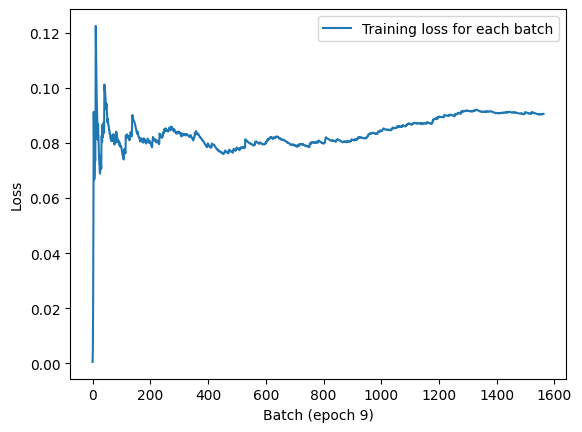

In [60]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### Monitoring and visualization with TensorBoard
使用在jupyter顯示TensorBoard

In [61]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="/full_path_to_your_log_dir",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 0.2947 - accuracy: 0.9135 - val_loss: 0.1433 - val_accuracy: 0.9575
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1678 - accuracy: 0.9535 - val_loss: 0.1211 - val_accuracy: 0.9670
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1395 - accuracy: 0.9628 - val_loss: 0.1100 - val_accuracy: 0.9711
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1268 - accuracy: 0.9670 - val_loss: 0.1133 - val_accuracy: 0.9730
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1163 - accuracy: 0.9710 - val_loss: 0.1029 - val_accuracy: 0.9762
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1089 - accuracy: 0.9736 - val_loss: 0.1311 - val_accuracy: 0.9716
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1063 - accuracy: 0.9752 - val_loss: 0.1052 - val_accuracy:

In [62]:
%load_ext tensorboard
%tensorboard --logdir /full_path_to_your_log_dir

## Writing your own training and evaluation loops
使用自己的training and evaluation loops

### Training versus inference

### Low-level usage of metrics
一些metrics的使用

In [91]:
#更新state
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")


result: 1.00


In [92]:
current_result

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [93]:
#平均
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

Mean of values: 2.00


In [104]:
##追蹤指標平均
values = [10, 20, 30, 40, 50]
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

Mean of values: 20.67


### A complete training and evaluation loop
完整的訓練和評估

**Writing a step-by-step training loop: the training step function**

In [105]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

**Writing a step-by-step training loop: resetting the metrics**

重設metrics

In [106]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**Writing a step-by-step training loop: the loop itself**

In [97]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9142
...loss: 0.2931
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9540
...loss: 0.1677
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9618
...loss: 0.1419


**Writing a step-by-step evaluation loop**

In [98]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9664
...val_loss: 0.1401


### Make it fast with tf.function
使用 tf.function 加速

**Adding a `tf.function` decorator to our evaluation-step function**

在函數中添加 tf.function 

In [99]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9664
...val_loss: 0.1401


### Leveraging fit() with a custom training loop
使用fit()來自定義訓練

**Implementing a custom training step to use with `fit()`**

In [100]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self):
        return [loss_tracker]

In [101]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2928
Epoch 2/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1630
Epoch 3/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1388


In [102]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name: m.result() for m in self.metrics}

In [103]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2931 - sparse_categorical_accuracy: 0.9128
Epoch 2/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1628 - sparse_categorical_accuracy: 0.9550
Epoch 3/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1380 - sparse_categorical_accuracy: 0.9635


## Summary